<a href="https://colab.research.google.com/github/salazarcristian1014/Wine-Dataset-Excersice/blob/main/excercise_wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQQ_pzoD4f0QdPeL-JIE8ZYCqoVsFlAgUzeQ1YU9R_LiFWUJ8vfjs0tgyqty7gCZ1l-nJN-6_naTd7i/pub?gid=2018859349&single=true&output=csv')

1. GETTING INFOMRATION FROM THE DATASET:

let´s have a look to the first (5) lines

In [ ]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.3              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.2              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

getting more information about the (lines,columns)

In [ ]:
print(df.shape)

(1999, 12)


getting a better description of the data in each column

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1999 non-null   float64
 1   volatile acidity      1999 non-null   float64
 2   citric acid           1999 non-null   float64
 3   residual sugar        1999 non-null   float64
 4   chlorides             1999 non-null   float64
 5   free sulfur dioxide   1999 non-null   float64
 6   total sulfur dioxide  1999 non-null   float64
 7   density               1999 non-null   float64
 8   pH                    1999 non-null   float64
 9   sulphates             1999 non-null   float64
 10  alcohol               1999 non-null   float64
 11  quality               1999 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 187.5 KB
None


2. CLEANNING THE DATA:

Identify null values

In [ ]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


There is not null values so we do not have to drop or fill values for now, let´s continue with the descriptive analisis.

3. DESCRIPTIVE ANALISIS

Getting a basic distribution from the data

In [ ]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1999.000000       1999.000000  1999.000000     1999.000000   
mean        8.670335          0.541773     0.246668        3.699090   
std         2.240023          0.180381     0.181348        3.290201   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.400000     0.110000        2.000000   
50%         8.000000          0.530000     0.200000        2.300000   
75%         9.900000          0.660000     0.385000        3.460000   
max        15.900000          1.580000     1.000000       15.990000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1999.000000          1999.000000           1999.000000  1999.000000   
mean      0.075858            20.191096             52.617809     0.996477   
std       0.048373            15.642224             37.051121     0.002110   
min       0.010000             1.000000         

showing the distribution from the numeric column that we are interest in (quality), from the information we can say that most of the wine bottles have a quality of 5 and 6


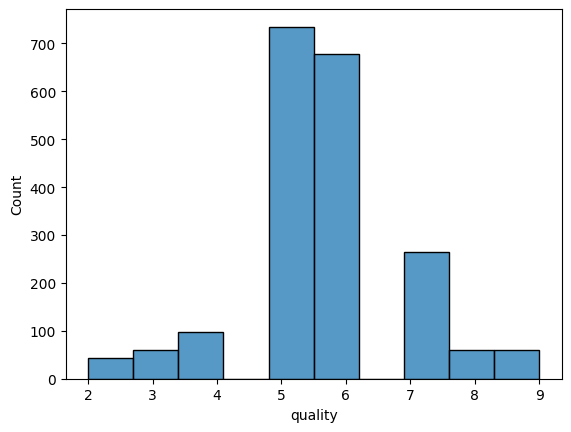

In [ ]:
sns.histplot(df['quality'], bins=10)
plt.show()

now is time to see the correlation beetwen the 'quality' and the other columns or information we have  

In [ ]:
correlacion = df.corr()
correlacion_quality = correlacion['quality'].sort_values(ascending=False)
correlacion_quality

,quality
quality,1.000000
alcohol,0.205632
citric acid,0.123969
fixed acidity,0.044831
sulphates,0.012514
pH,0.002414
free sulfur dioxide,-0.007025
residual sugar,-0.007909
total sulfur dioxide,-0.049939
chlorides,-0.054139


From last information we can asume that:

- Alcohol (positive correlation: 0.21): The higher the alcohol level, the quality of the wine tends to improve.

- Citric acid (positive correlation: 0.12): Citric acid also has a slight positive influence on quality.

- Fixed acidity (positive correlation: 0.04): Very weak relationship with quality.

- Volatile acidity (negative correlation: -0.17): The higher the volatile acidity, the quality of the wine tends to be worse.

- Density (negative correlation: -0.09): It also affects slightly negatively.


These relationships suggest that alcohol and volatile acidity levels are key factors in predicting wine quality.

But let´s make sure of the information with the next graphics

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


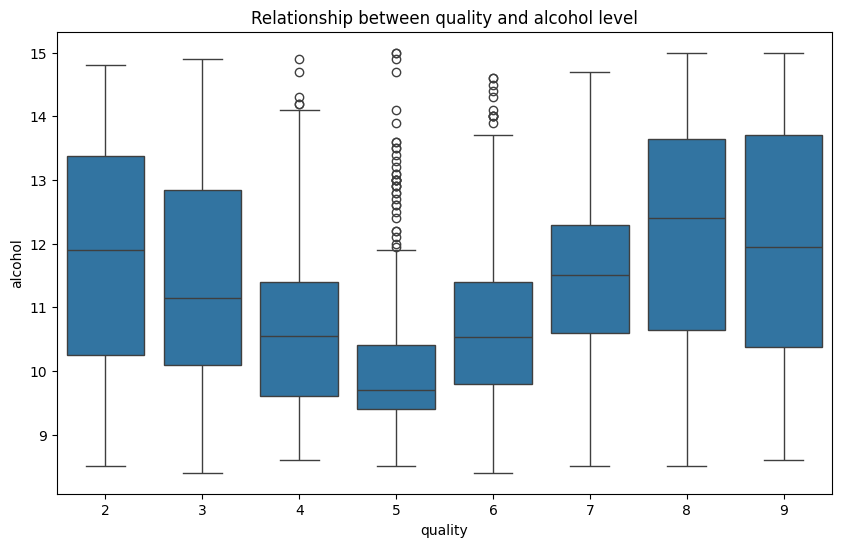

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


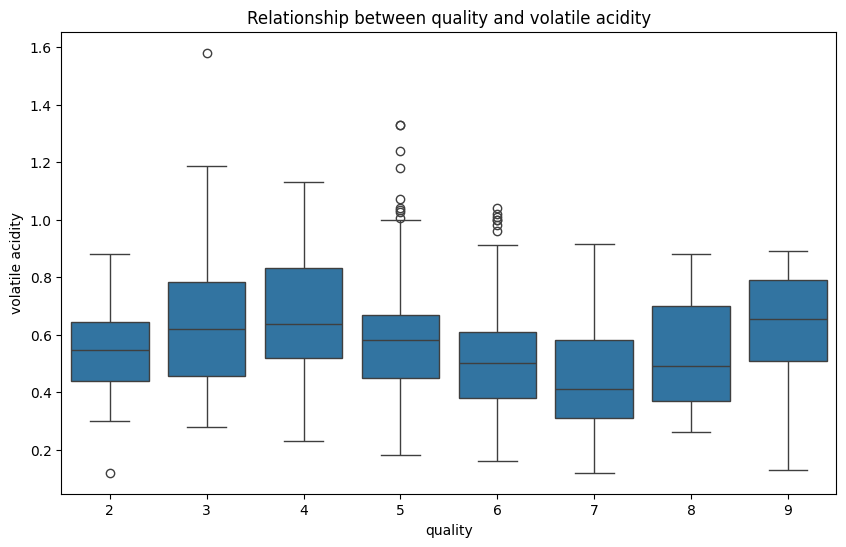

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Relationship between quality and alcohol level')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Relationship between quality and volatile acidity')
plt.show()

Now in base to the last information let´s create a ML model to predict the Wine quality

1. PREPARING THE DATA SET


Divide the data into predictor variables (features) and the objective variable (target).


In [ ]:
X = df.drop('quality', axis=1)  # Variables predictoras
y = df['quality']  # Variable objetivo (calidad)

Split the dataset into training and test sets to evaluate model performance.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. DATA NORMALIZATION

Since features have different scales, it is important to normalize the data to improve the performance of some models.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. MODEL SELECTION


We will use a Linear Regression model as a starting point

In [ ]:
model = LinearRegression()

4. MODEL TRAINING

Train the model using the training set.

In [ ]:
model.fit(X_train_scaled, y_train)

LinearRegression()

5. MODEL EVALUATION

Once trained, we evaluate the performance on the test set.

- Realiza predicciones sobre el conjunto de prueba.

In [ ]:
y_pred = model.predict(X_test_scaled)

- Evalúa el rendimiento usando métricas como el R² y el error cuadrático medio.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 1.4026426577700903
Coeficiente de determinación (R²): 0.06769791647848966


6. MODEL OPTIMIZATION

If performance is not satisfactory, you can try more complex models such as Random Forest or tune hyperparameters using Grid Search.


In [ ]:
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"MSE con el mejor modelo: {mse_best}")
print(f"R² con el mejor modelo: {r2_best}")

MSE con el mejor modelo: 1.277849
R² con el mejor modelo: 0.1506451921119646


Now let's make a test that shows a prediction of the wine quality in base of the information

In [ ]:
nuevo_vino = [[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]]

nuevo_vino_scaled = scaler.transform(nuevo_vino)

prediccion = model.predict(nuevo_vino_scaled)
print(f"Predicción de calidad para el nuevo vino: {prediccion}")

Predicción de calidad para el nuevo vino: [5.14269837]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
